In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv
# the next two lines will expand the printed tables
pd.options.display.max_rows= 40000
pd.options.display.max_columns= 40000

# Function to calculate breakpoints
def calculate_breakpoints(df):
    FR = df["FR"]
    breakpoints = [abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]
    return breakpoints

# Function to get max pellets
def get_max_pellets(df):
    max_pellets = df["Pellet_Count"].max()
    return max_pellets

# Function to get events
def get_FEDevents(filename, eventname, formats=['%m/%d/%Y %H:%M:%S']):
    with open(filename) as file:
        csvreader = csv.reader(file)
        next(csvreader)  # Skip header
        rows = [row for row in csvreader if row[9] == eventname]

    timestamps = [datetime.strptime(row[0], formats[0]) for row in rows]
    
    if not timestamps:
        return [], None

    refpoint = timestamps[0].replace(hour=7, minute=0, second=0, microsecond=0)
    pellettimes = [(t - refpoint).total_seconds() / 3600 for t in timestamps]

    return pellettimes, refpoint

# Load the metafile
metafile_path = "../FEDXD_METAFILE.csv"
metafile = pd.read_csv(metafile_path)

# Filter for choice session 4
choice_4 = metafile[metafile['CHOICE_SESSION'] == 4]

# Initialize a list to hold results
results = []

# Iterate through the filtered rows
for _, row in choice_4.iterrows():
    mouse_id = row['MOUSEID']
    sex = row['SEX']
    diet = row['DIET']
    choice_session = row['CHOICE_SESSION']
    pellet_type = row[5]
    filename = f"../data/{row[3]}"
    
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"File not found: {filename}")
        continue
    
    # Calculate breakpoints and max pellets
    breakpoints = calculate_breakpoints(df)
    max_pellets = get_max_pellets(df)
    
    for breakpoint in breakpoints:
        results.append({
            "MOUSEID": mouse_id,
            "SEX": sex,
            "DIET": diet,
            "CHOICE_SESSION": choice_session,
            "PELLET_TYPE": pellet_type,
            "BREAKPOINT": breakpoint,
            "MAX_PELLETS": max_pellets
        })

# Convert results to DataFrame and save
results_df = pd.DataFrame(results)
# results_df.to_csv("/mnt/data/Choice_Session_4_Breakpoints.csv", index=False)

results_df.head()
results_df

C:\Users\hta031\AppData\Local\Temp\ipykernel_68936\1499762498.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pellet_type = row[5]
C:\Users\hta031\AppData\Local\Temp\ipykernel_68936\1499762498.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  filename = f"../data/{row[3]}"
C:\Users\hta031\AppData\Local\Temp\ipykernel_68936\1499762498.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pellet_type = row[5]
C:\Users\hta031\Ap

,MOUSEID,SEX,DIET,CHOICE_SESSION,PELLET_TYPE,BREAKPOINT,MAX_PELLETS
0,FEDXDF1,F,PR,4,CAS5,20,66
1,FEDXDF1,F,PR,4,CAS5,8,66
2,FEDXDF1,F,PR,4,CAS5,100,66
3,FEDXDF1,F,PR,4,SUC,8,33
4,FEDXDF1,F,PR,4,SUC,54,33
5,FEDXDF2,F,PR,4,CAS5,12,77
6,FEDXDF2,F,PR,4,CAS5,4,77
7,FEDXDF2,F,PR,4,CAS5,10,77
8,FEDXDF2,F,PR,4,CAS5,4,77
9,FEDXDF2,F,PR,4,CAS5,14,77


# counting the sum of break points 

# cell below calculates all breakpoints reached by each mouse and for each choice

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv

# Expand printed tables
pd.options.display.max_rows = 40000
pd.options.display.max_columns = 40000

# Function to calculate breakpoints
def calculate_breakpoints(df):
    FR = df["FR"]
    breakpoints = [abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]
    return breakpoints

# Function to get max pellets
def get_max_pellets(df):
    max_pellets = df["Pellet_Count"].max()
    return max_pellets

# Function to get events
def get_FEDevents(filename, eventname, formats=['%m/%d/%Y %H:%M:%S']):
    with open(filename) as file:
        csvreader = csv.reader(file)
        next(csvreader)  # Skip header
        rows = [row for row in csvreader if row[9] == eventname]

    timestamps = [datetime.strptime(row[0], formats[0]) for row in rows]
    
    if not timestamps:
        return [], None

    refpoint = timestamps[0].replace(hour=7, minute=0, second=0, microsecond=0)
    pellettimes = [(t - refpoint).total_seconds() / 3600 for t in timestamps]

    return pellettimes, refpoint

# Load the metafile
metafile_path = "../FEDXD_METAFILE.csv"
metafile = pd.read_csv(metafile_path)

# Filter for choice session 4
choice_4 = metafile[metafile['CHOICE_SESSION'] == 4]

# Initialize a list to hold results
results = []

# Iterate through the filtered rows
for _, row in choice_4.iterrows():
    mouse_id = row['MOUSEID']
    sex = row['SEX']
    diet = row['DIET']
    choice_session = row['CHOICE_SESSION']
    pellet_type = row['FED_PELLET']
    filename = f"../data/{row['FEDFILE']}"
    
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"File not found: {filename}")
        continue
    
    # Calculate breakpoints and max pellets
    breakpoints = calculate_breakpoints(df)
    max_pellets = get_max_pellets(df)
    
    # Append each break point as a separate entry
    for breakpoint in breakpoints:
        results.append({
            "MOUSEID": mouse_id,
            "SEX": sex,
            "DIET": diet,
            "CHOICE_SESSION": choice_session,
            "PELLET_TYPE": pellet_type,
            "BREAKPOINT": breakpoint,
            "MAX_PELLETS": max_pellets
        })

# Convert results to DataFrame and save
results_df = pd.DataFrame(results)
#results_df.to_csv("/mnt/data/Choice_Session_4_Breakpoints.csv", index=False)

results_df


,MOUSEID,SEX,DIET,CHOICE_SESSION,PELLET_TYPE,BREAKPOINT,MAX_PELLETS
0,FEDXDF1,F,PR,4,CAS5,20,66
1,FEDXDF1,F,PR,4,CAS5,8,66
2,FEDXDF1,F,PR,4,CAS5,100,66
3,FEDXDF1,F,PR,4,SUC,8,33
4,FEDXDF1,F,PR,4,SUC,54,33
5,FEDXDF2,F,PR,4,CAS5,12,77
6,FEDXDF2,F,PR,4,CAS5,4,77
7,FEDXDF2,F,PR,4,CAS5,10,77
8,FEDXDF2,F,PR,4,CAS5,4,77
9,FEDXDF2,F,PR,4,CAS5,14,77


# Cell below gets the average breakpoints reached per choice per mice

In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv

# Function to calculate breakpoints
def calculate_breakpoints(df):
    FR = df["FR"]
    breakpoints = [abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]
    return breakpoints

# Function to get max pellets
def get_max_pellets(df):
    max_pellets = df["Pellet_Count"].max()
    return max_pellets

# Load the metafile
metafile_path = '../FEDXD_METAFILE.csv'
metafile = pd.read_csv(metafile_path)

# Filter for choice session 4
choice_4 = metafile[metafile['CHOICE_SESSION'] == 4]

# Initialize a dictionary to hold results
results = {}

# Iterate through the filtered rows
for _, row in choice_4.iterrows():
    mouse_id = row['MOUSEID']
    sex = row['SEX']
    diet = row['DIET']
    choice_session = row['CHOICE_SESSION']
    pellet_type = row['FED_PELLET']
    filename = f"../data/{row['FEDFILE']}"
    
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"File not found: {filename}")
        continue
    
    # Calculate breakpoints and max pellets
    breakpoints = calculate_breakpoints(df)
    avg_breakpoints = np.mean(breakpoints) if breakpoints else 0
    max_pellets = get_max_pellets(df)
    
    key = (mouse_id, pellet_type)
    if key not in results:
        results[key] = {
            "MOUSEID": mouse_id,
            "SEX": sex,
            "DIET": diet,
            "CHOICE_SESSION": choice_session,
            "PELLET_TYPE": pellet_type,
            "AVG_BREAKPOINTS": [],
            "MAX_PELLETS": max_pellets
        }
    
    results[key]["AVG_BREAKPOINTS"].append(avg_breakpoints)

# Calculate the average of average breakpoints for each mouse and pellet type
final_results = []
for key, value in results.items():
    avg_breakpoints = np.mean(value["AVG_BREAKPOINTS"])
    final_results.append({
        "MOUSEID": value["MOUSEID"],
        "SEX": value["SEX"],
        "DIET": value["DIET"],
        "CHOICE_SESSION": value["CHOICE_SESSION"],
        "PELLET_TYPE": value["PELLET_TYPE"],
        "AVG_BREAKPOINTS": avg_breakpoints,
        "MAX_PELLETS": value["MAX_PELLETS"]
    })

# Convert final results to DataFrame and save
results_df = pd.DataFrame(final_results)
#results_df.to_csv("/mnt/data/Choice_Session_4_Avg_Breakpoints.csv", index=False)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Average Break Points for Choice Session 4", dataframe=results_df)

results_df
#results_df.to_csv("../results/Choice_Session_4_Avg_Breakpoints.csv", index=False)

,MOUSEID,SEX,DIET,CHOICE_SESSION,PELLET_TYPE,AVG_BREAKPOINTS,MAX_PELLETS
0,FEDXDF1,F,PR,4,CAS5,42.666667,66
1,FEDXDF1,F,PR,4,SUC,31.000000,33
2,FEDXDF2,F,PR,4,CAS5,8.800000,77
3,FEDXDF2,F,PR,4,SUC,4.000000,47
4,FEDXDF3,F,PR,4,CAS5,18.000000,63
5,FEDXDF3,F,PR,4,SUC,10.000000,48
6,FEDXDF4,F,PR,4,CAS5,18.857143,80
7,FEDXDF4,F,PR,4,SUC,9.142857,43
8,FEDXDF5,F,PR,4,CAS5,14.000000,55
9,FEDXDF5,F,PR,4,SUC,7.333333,48


In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv

# Function to calculate breakpoints
def calculate_breakpoints(df):
    FR = df["FR"]
    breakpoints = [abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]
    return breakpoints

# Function to get max pellets
def get_max_pellets(df):
    max_pellets = df["Pellet_Count"].max()
    return max_pellets

# Load the metafile
metafile_path = '../FEDXD_METAFILE.csv'
metafile = pd.read_csv(metafile_path)

# Filter for choice session 4
choice_4 = metafile[metafile['CHOICE_SESSION'] == 4]

# Initialize a dictionary to hold results
results = {}

# Iterate through the filtered rows
for _, row in choice_4.iterrows():
    mouse_id = row['MOUSEID']
    sex = row['SEX']
    diet = row['DIET']
    choice_session = row['CHOICE_SESSION']
    pellet_type = row['FED_PELLET']
    filename = f"../data/{row['FEDFILE']}"
    
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"File not found: {filename}")
        continue
    
    # Calculate breakpoints and max pellets
    breakpoints = calculate_breakpoints(df)
    avg_breakpoints = np.mean(breakpoints) if breakpoints else 0
    sum_breakpoints = np.sum(breakpoints) if breakpoints else 0
    max_pellets = get_max_pellets(df)
    
    key = (mouse_id, pellet_type)
    if key not in results:
        results[key] = {
            "MOUSEID": mouse_id,
            "SEX": sex,
            "DIET": diet,
            "CHOICE_SESSION": choice_session,
            "PELLET_TYPE": pellet_type,
            "AVG_BREAKPOINTS": [],
            "SUM_BREAKPOINTS": [],
            "MAX_PELLETS": max_pellets
        }
    
    results[key]["AVG_BREAKPOINTS"].append(avg_breakpoints)
    results[key]["SUM_BREAKPOINTS"].append(sum_breakpoints)

# Calculate the average of average breakpoints for each mouse and pellet type
final_results = []
for key, value in results.items():
    avg_breakpoints = np.mean(value["AVG_BREAKPOINTS"])
    sum_breakpoints = np.sum(value["SUM_BREAKPOINTS"])
    final_results.append({
        "MOUSEID": value["MOUSEID"],
        "SEX": value["SEX"],
        "DIET": value["DIET"],
        "CHOICE_SESSION": value["CHOICE_SESSION"],
        "PELLET_TYPE": value["PELLET_TYPE"],
        "AVG_BREAKPOINTS": avg_breakpoints,
        "SUM_BREAKPOINTS": sum_breakpoints,
        "MAX_PELLETS": value["MAX_PELLETS"]
    })

# Convert final results to DataFrame and save
results_df = pd.DataFrame(final_results)
#results_df.to_csv("/mnt/data/Choice_Session_4_Avg_Breakpoints.csv", index=False)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Average Break Points for Choice Session 4", dataframe=results_df)

results_df
#results_df.to_csv("../results/Choice_Session_4_sum_Breakpoints.csv", index=False)

,MOUSEID,SEX,DIET,CHOICE_SESSION,PELLET_TYPE,AVG_BREAKPOINTS,SUM_BREAKPOINTS,MAX_PELLETS
0,FEDXDF1,F,PR,4,CAS5,42.666667,128,66
1,FEDXDF1,F,PR,4,SUC,31.000000,62,33
2,FEDXDF2,F,PR,4,CAS5,8.800000,44,77
3,FEDXDF2,F,PR,4,SUC,4.000000,12,47
4,FEDXDF3,F,PR,4,CAS5,18.000000,36,63
5,FEDXDF3,F,PR,4,SUC,10.000000,20,48
6,FEDXDF4,F,PR,4,CAS5,18.857143,132,80
7,FEDXDF4,F,PR,4,SUC,9.142857,64,43
8,FEDXDF5,F,PR,4,CAS5,14.000000,28,55
9,FEDXDF5,F,PR,4,SUC,7.333333,22,48


In [16]:

import pandas as pd
import numpy as np
from datetime import datetime
import csv

# Function to calculate breakpoints
def calculate_breakpoints(df):
    FR = df["FR"]
    breakpoints = [abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]
    return breakpoints

# Function to get max pellets
def get_max_pellets(df):
    max_pellets = df["Pellet_Count"].max()
    return max_pellets

# Load the metafile
metafile_path = '../FEDXD_METAFILE.csv'
metafile = pd.read_csv(metafile_path)

# Filter for choice session 4
choice_4 = metafile[metafile['CHOICE_SESSION'] == 4]

# Initialize a dictionary to hold results
results = {}

# Iterate through the filtered rows
for _, row in choice_4.iterrows():
    mouse_id = row['MOUSEID']
    sex = row['SEX']
    diet = row['DIET']
    choice_session = row['CHOICE_SESSION']
    pellet_type = row['FED_PELLET']
    filename = f"../data/{row['FEDFILE']}"
    
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"File not found: {filename}")
        continue
    
    # Calculate breakpoints and max pellets
    breakpoints = calculate_breakpoints(df)
    avg_breakpoints = np.mean(breakpoints) if breakpoints else 0
    max_pellets = get_max_pellets(df)
    
    # Calculate the COST (number of pokes divided by number of pellets earned)
    total_pokes = df["Left_Poke_Count"].sum()
    total_pellets = df["Pellet_Count"].sum()
    cost = total_pokes / total_pellets if total_pellets > 0 else np.nan
    
    # Calculate the ratio of correct (active) to incorrect (inactive) pokes
    total_active_pokes = df["Left_Poke_Count"].sum()
    total_inactive_pokes = df["Right_Poke_Count"].sum()
    poke_ratio = total_active_pokes / total_inactive_pokes if total_inactive_pokes > 0 else np.nan
    
    key = (mouse_id, pellet_type)
    if key not in results:
        results[key] = {
            "MOUSEID": mouse_id,
            "SEX": sex,
            "DIET": diet,
            "CHOICE_SESSION": choice_session,
            "PELLET_TYPE": pellet_type,
            "AVG_BREAKPOINTS": [],
            "MAX_PELLETS": max_pellets,
            "COST": [],
            "POKE_RATIO": []
        }
    
    results[key]["AVG_BREAKPOINTS"].append(avg_breakpoints)
    results[key]["COST"].append(cost)
    results[key]["POKE_RATIO"].append(poke_ratio)

# Calculate the average of average breakpoints, cost, and poke ratio for each mouse and pellet type
final_results = []
for key, value in results.items():
    avg_breakpoints = np.mean(value["AVG_BREAKPOINTS"])
    avg_cost = np.nanmean(value["COST"])
    avg_poke_ratio = np.nanmean(value["POKE_RATIO"])
    final_results.append({
        "MOUSEID": value["MOUSEID"],
        "SEX": value["SEX"],
        "DIET": value["DIET"],
        "CHOICE_SESSION": value["CHOICE_SESSION"],
        "PELLET_TYPE": value["PELLET_TYPE"],
        "AVG_BREAKPOINTS": avg_breakpoints,
        "MAX_PELLETS": value["MAX_PELLETS"],
        "COST": avg_cost,
        "POKE_RATIO": avg_poke_ratio
    })

# Convert final results to DataFrame and save
results_df = pd.DataFrame(final_results)

# Uncomment the following lines to save the results to a file
# results_df.to_csv("/mnt/data/Choice_Session_4_Avg_Breakpoints_Cost_and_Poke_Ratio.csv", index=False)
# import ace_tools as tools; tools.display_dataframe_to_user(name="Average Break Points, Cost and Poke Ratio for Choice Session 4", dataframe=results_df)

results_df
results_df.to_csv("../results/Choice_Cost_and_Poke_Ratio.csv", index=False)


# plotting the break points


c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


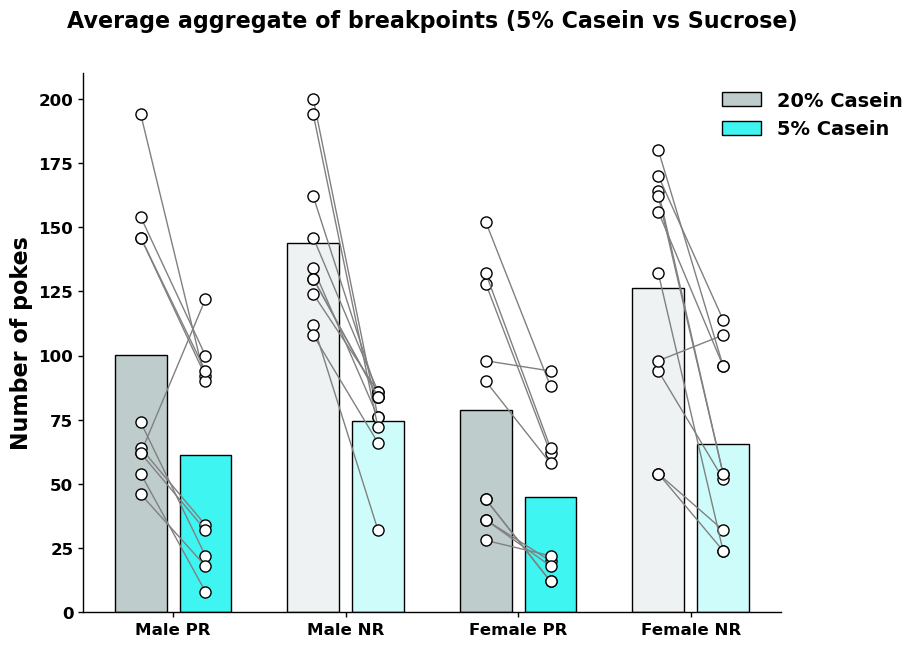

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


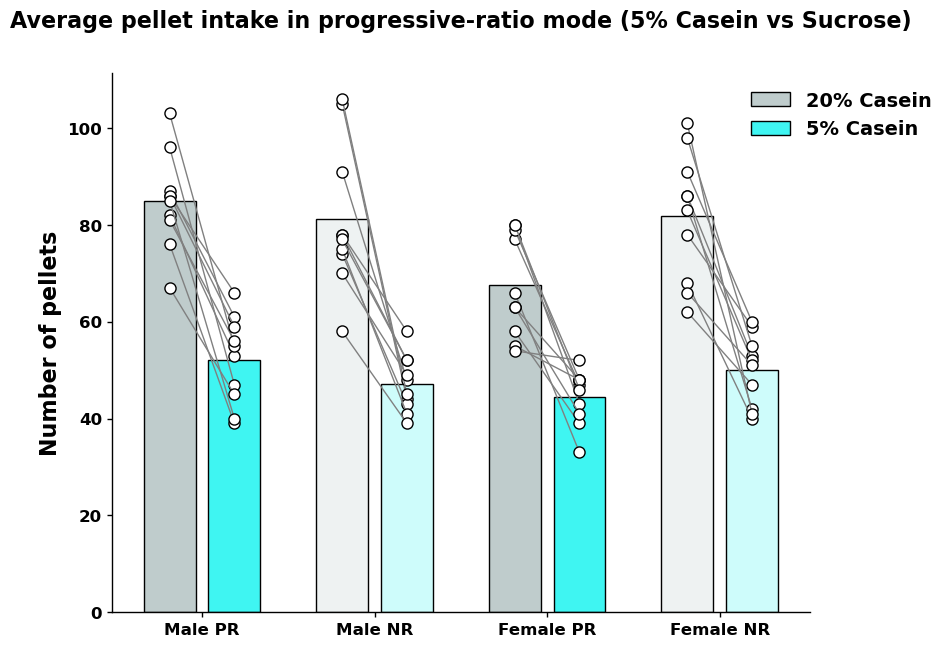

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import trompy as tp

fig_folder = r"../plots\FINAL_PLOTS_FOR_FENS24\C4\\"

from matplotlib import rc

plt.rcParams.update({
    'font.size': 16,          # Global font size
    'font.weight': 'bold',    # Global font weight
    'axes.titlesize': 16,     # Font size of the axes title
    'axes.titleweight': 'bold', # Font weight of the axes title
    'axes.labelsize': 16,     # Font size of the x and y labels
    'axes.labelweight': 'bold', # Font weight of the x and y labels
    'xtick.labelsize': 12,    # Font size of the x tick labels
    'ytick.labelsize': 12,    # Font size of the y tick labels
    'legend.fontsize': 14,    # Font size of the legend
    'figure.titlesize': 16,   # Font size of the figure title
    'figure.titleweight': 'bold' # Font weight of the figure title
})

# Load the data
file_path = "../results/Choice_Session_4_sum_Breakpoints.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Extract the required data for plotting
def extract_data(sex, diet, pellet_type):
    return data[(data['SEX'] == sex) & (data['DIET'] == diet) & (data['PELLET_TYPE'] == pellet_type)]['SUM_BREAKPOINTS'].tolist()

# Group data appropriately
pellet_count_group_data_male_pr = [extract_data('M', 'PR', 'CAS5'), extract_data('M', 'PR', 'SUC')]
pellet_count_group_data_male_nr = [extract_data('M', 'NR', 'CAS5'), extract_data('M', 'NR', 'SUC')]
pellet_count_group_data_female_pr = [extract_data('F', 'PR', 'CAS5'), extract_data('F', 'PR', 'SUC')]
pellet_count_group_data_female_nr = [extract_data('F', 'NR', 'CAS5'), extract_data('F', 'NR', 'SUC')]


high_protein_color = (0.749, 0.8, 0.8)
low_protein_color = (0.247, 0.961, 0.949)
# the last element of the tuple is alpha value
high_protein_color_alpha = (0.749, 0.8, 0.8, 0.25)
low_protein_color_alpha = (0.247, 0.961, 0.949, 0.25)
# Plot the data for average breakpoints
f, ax = plt.subplots(figsize=(9, 7))
positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]

_, _, barlist, _ = tp.barscatter([pellet_count_group_data_male_pr, pellet_count_group_data_male_nr, pellet_count_group_data_female_pr, pellet_count_group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.75,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*8,
                                 barfacecolor=[high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha, high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha],
                                 positions=positions) 

ax.set_title('Average aggregate of breakpoints (5% Casein vs Sucrose)',y=1.07)
ax.legend(barlist, ['20% Casein', '5% Casein'], frameon = False,bbox_to_anchor=(1.2, 1))
ax.set_ylabel('Number of pokes')
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Male PR', 'Male NR', 'Female PR', 'Female NR'])
f.savefig(fig_folder + 'Average_aggregate_of_breakpoints.pdf', bbox_inches='tight')
plt.show()

# Extract the required data for max pellets
def extract_max_data(sex, diet, pellet_type):
    return data[(data['SEX'] == sex) & (data['DIET'] == diet) & (data['PELLET_TYPE'] == pellet_type)]['MAX_PELLETS'].tolist()

# Group data appropriately
pellet_count_group_data_male_pr_max = [extract_max_data('M', 'PR', 'CAS5'), extract_max_data('M', 'PR', 'SUC')]
pellet_count_group_data_male_nr_max = [extract_max_data('M', 'NR', 'CAS5'), extract_max_data('M', 'NR', 'SUC')]
pellet_count_group_data_female_pr_max = [extract_max_data('F', 'PR', 'CAS5'), extract_max_data('F', 'PR', 'SUC')]
pellet_count_group_data_female_nr_max = [extract_max_data('F', 'NR', 'CAS5'), extract_max_data('F', 'NR', 'SUC')]

# Plot the data for max pellets
f, ax = plt.subplots(figsize=(9, 7))
positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]

_, _, barlist, _ = tp.barscatter([pellet_count_group_data_male_pr_max, pellet_count_group_data_male_nr_max, pellet_count_group_data_female_pr_max, pellet_count_group_data_female_nr_max],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.75,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*8,
                                 barfacecolor=[high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha, high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha],
                                 positions=positions) 

ax.set_title('Average pellet intake in progressive ratio mode (5% Casein vs Sucrose)', y=1.07)
ax.legend(barlist, ['20% Casein', '5% Casein'], frameon = False,bbox_to_anchor=(1.2, 1)) 

ax.set_ylabel('Number of pellets')
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Male PR', 'Male NR', 'Female PR', 'Female NR'])
f.savefig(fig_folder + 'Average_pellet_intake_in_progressive_ratio_mode.pdf', bbox_inches='tight')
plt.show()





c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


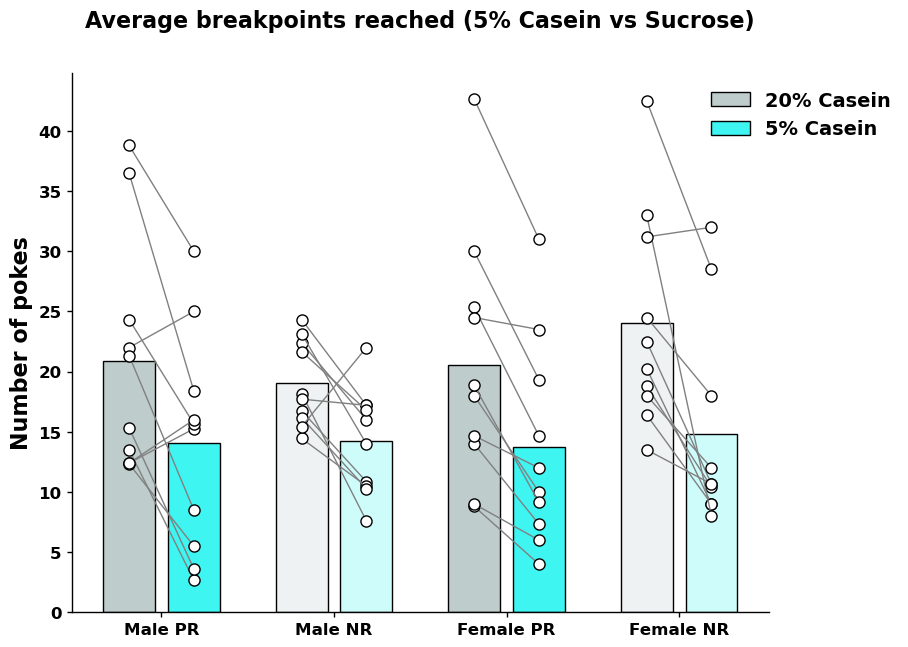

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import trompy as tp

# Define plot style settings
plt.rcParams.update({
    'font.size': 16,          # Global font size
    'font.weight': 'bold',    # Global font weight
    'axes.titlesize': 16,     # Font size of the axes title
    'axes.titleweight': 'bold', # Font weight of the axes title
    'axes.labelsize': 16,     # Font size of the x and y labels
    'axes.labelweight': 'bold', # Font weight of the x and y labels
    'xtick.labelsize': 12,    # Font size of the x tick labels
    'ytick.labelsize': 12,    # Font size of the y tick labels
    'legend.fontsize': 14,    # Font size of the legend
    'figure.titlesize': 16,   # Font size of the figure title
    'figure.titleweight': 'bold' # Font weight of the figure title
})

# Load the data
file_path = '../results/Choice_Session_4_Avg_Breakpoints.csv'  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Extract the required data for plotting
def extract_data(sex, diet, pellet_type):
    return data[(data['SEX'] == sex) & (data['DIET'] == diet) & (data['PELLET_TYPE'] == pellet_type)]['AVG_BREAKPOINTS'].tolist()

# Group data appropriately
pellet_count_group_data_male_pr = [extract_data('M', 'PR', 'CAS5'), extract_data('M', 'PR', 'SUC')]
pellet_count_group_data_male_nr = [extract_data('M', 'NR', 'CAS5'), extract_data('M', 'NR', 'SUC')]
pellet_count_group_data_female_pr = [extract_data('F', 'PR', 'CAS5'), extract_data('F', 'PR', 'SUC')]
pellet_count_group_data_female_nr = [extract_data('F', 'NR', 'CAS5'), extract_data('F', 'NR', 'SUC')]

# Define the color values
high_protein_color = (0.749, 0.8, 0.8)
low_protein_color = (0.247, 0.961, 0.949)
high_protein_color_alpha = (0.749, 0.8, 0.8, 0.25)
low_protein_color_alpha = (0.247, 0.961, 0.949, 0.25)

# Plot the data for average breakpoints
f, ax = plt.subplots(figsize=(9, 7))
positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]

_, _, barlist, _ = tp.barscatter([pellet_count_group_data_male_pr, pellet_count_group_data_male_nr, pellet_count_group_data_female_pr, pellet_count_group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.75,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*8,
                                 barfacecolor=[high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha, high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha],
                                 positions=positions) 

ax.set_title('Average breakpoints reached (5% Casein vs Sucrose)', y=1.07)
ax.legend(barlist, ['20% Casein', '5% Casein'], frameon=False, bbox_to_anchor=(1.2, 1))

ax.set_ylabel('Number of pokes')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Male PR', 'Male NR', 'Female PR', 'Female NR'])
f.savefig('../plots/FINAL_PLOTS_FOR_FENS24/C4/Average_breakpoints_reached.pdf', bbox_inches='tight')
plt.show()

# # Extract the required data for max pellets
# def extract_max_data(sex, diet, pellet_type):
#     return data[(data['SEX'] == sex) & (data['DIET'] == diet) & (data['PELLET_TYPE'] == pellet_type)]['MAX_PELLETS'].tolist()

# # Group data appropriately
# pellet_count_group_data_male_pr_max = [extract_max_data('M', 'PR', 'CAS5'), extract_max_data('M', 'PR', 'SUC')]
# pellet_count_group_data_male_nr_max = [extract_max_data('M', 'NR', 'CAS5'), extract_max_data('M', 'NR', 'SUC')]
# pellet_count_group_data_female_pr_max = [extract_max_data('F', 'PR', 'CAS5'), extract_max_data('F', 'PR', 'SUC')]
# pellet_count_group_data_female_nr_max = [extract_max_data('F', 'NR', 'CAS5'), extract_max_data('F', 'NR', 'SUC')]

# # Plot the data for max pellets
# f, ax = plt.subplots(figsize=(9, 7))
# positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]

# _, _, barlist, _ = tp.barscatter([pellet_count_group_data_male_pr_max, pellet_count_group_data_male_nr_max, pellet_count_group_data_female_pr_max, pellet_count_group_data_female_nr_max],
#                                  ax=ax, paired=True, linewidth=1, groupwidth=0.75,
#                                  barfacecolor_option="individual",
#                                  baredgecolor=["black"]*8,
#                                  barfacecolor=[high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha, high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha],
#                                  positions=positions) 

# ax.set_title('Pellet intake', y=1.07)
# ax.legend(barlist, ['20% Casein', '5% Casein'], frameon=False, bbox_to_anchor=(1.2, 1))
# ax.set_xlabel('Groups')
# ax.set_ylabel('Number of Pellets')
# ax.set_xticks([1, 2, 3, 4])
# ax.set_xticklabels(['Male PR', 'Male NR', 'Female PR', 'Female NR'])
# plt.show()


# cell below calculates number of time a breakpoint is reached before giving up and max break point


In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv

# Function to calculate breakpoints
def calculate_breakpoints(df):
    FR = df["FR"]
    breakpoints = [abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]
    num_breakpoints = len(breakpoints)
    max_breakpoint_ratio = max(breakpoints) if breakpoints else 0
    return num_breakpoints, max_breakpoint_ratio

# Function to get max pellets
def get_max_pellets(df):
    max_pellets = df["Pellet_Count"].max()
    return max_pellets

# Load the metafile
metafile_path = '../FEDXD_METAFILE.csv'
metafile = pd.read_csv(metafile_path)

# Filter for choice session 4
choice_4 = metafile[metafile['CHOICE_SESSION'] == 4]

# Initialize a dictionary to hold results
results = {}

# Iterate through the filtered rows
for _, row in choice_4.iterrows():
    mouse_id = row['MOUSEID']
    sex = row['SEX']
    diet = row['DIET']
    choice_session = row['CHOICE_SESSION']
    pellet_type = row['FED_PELLET']
    filename = f"../data/{row['FEDFILE']}"
    
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"File not found: {filename}")
        continue
    
    # Calculate breakpoints, max pellets, number of breakpoints, and max breakpoint ratio
    num_breakpoints, max_breakpoint_ratio = calculate_breakpoints(df)
    max_pellets = get_max_pellets(df)
    
    key = (mouse_id, pellet_type)
    if key not in results:
        results[key] = {
            "MOUSEID": mouse_id,
            "SEX": sex,
            "DIET": diet,
            "CHOICE_SESSION": choice_session,
            "PELLET_TYPE": pellet_type,
            "NUM_BREAKPOINTS": [],
            "MAX_BREAKPOINT_RATIO": [],
            "MAX_PELLETS": max_pellets
        }
    
    results[key]["NUM_BREAKPOINTS"].append(num_breakpoints)
    results[key]["MAX_BREAKPOINT_RATIO"].append(max_breakpoint_ratio)

# Calculate the average of number of breakpoints and max breakpoint ratio for each mouse and pellet type
final_results = []
for key, value in results.items():
    avg_num_breakpoints = np.mean(value["NUM_BREAKPOINTS"])
    avg_max_breakpoint_ratio = np.mean(value["MAX_BREAKPOINT_RATIO"])
    final_results.append({
        "MOUSEID": value["MOUSEID"],
        "SEX": value["SEX"],
        "DIET": value["DIET"],
        "CHOICE_SESSION": value["CHOICE_SESSION"],
        "PELLET_TYPE": value["PELLET_TYPE"],
        "AVG_NUM_BREAKPOINTS": avg_num_breakpoints,
        "AVG_MAX_BREAKPOINT_RATIO": avg_max_breakpoint_ratio,
        "MAX_PELLETS": value["MAX_PELLETS"]
    })

# Convert final results to DataFrame and save
results_df = pd.DataFrame(final_results)
#results_df.to_csv("/mnt/data/Choice_Session_4_Avg_Breakpoints.csv", index=False)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Average Break Points for Choice Session 4", dataframe=results_df)

results_df
#results_df.to_csv("../results/Choice_Session_4_max_num_breakpoints.csv", index=False)


,MOUSEID,SEX,DIET,CHOICE_SESSION,PELLET_TYPE,AVG_NUM_BREAKPOINTS,AVG_MAX_BREAKPOINT_RATIO,MAX_PELLETS
0,FEDXDF1,F,PR,4,CAS5,3.0,100.0,66
1,FEDXDF1,F,PR,4,SUC,2.0,54.0,33
2,FEDXDF2,F,PR,4,CAS5,5.0,14.0,77
3,FEDXDF2,F,PR,4,SUC,3.0,6.0,47
4,FEDXDF3,F,PR,4,CAS5,2.0,26.0,63
5,FEDXDF3,F,PR,4,SUC,2.0,14.0,48
6,FEDXDF4,F,PR,4,CAS5,7.0,38.0,80
7,FEDXDF4,F,PR,4,SUC,7.0,22.0,43
8,FEDXDF5,F,PR,4,CAS5,2.0,24.0,55
9,FEDXDF5,F,PR,4,SUC,3.0,14.0,48


c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


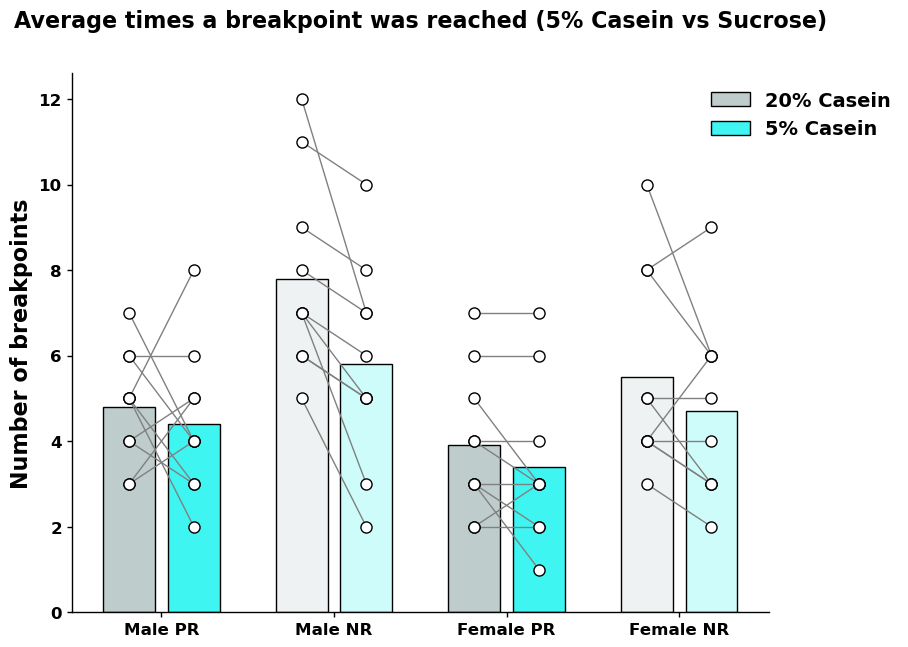

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


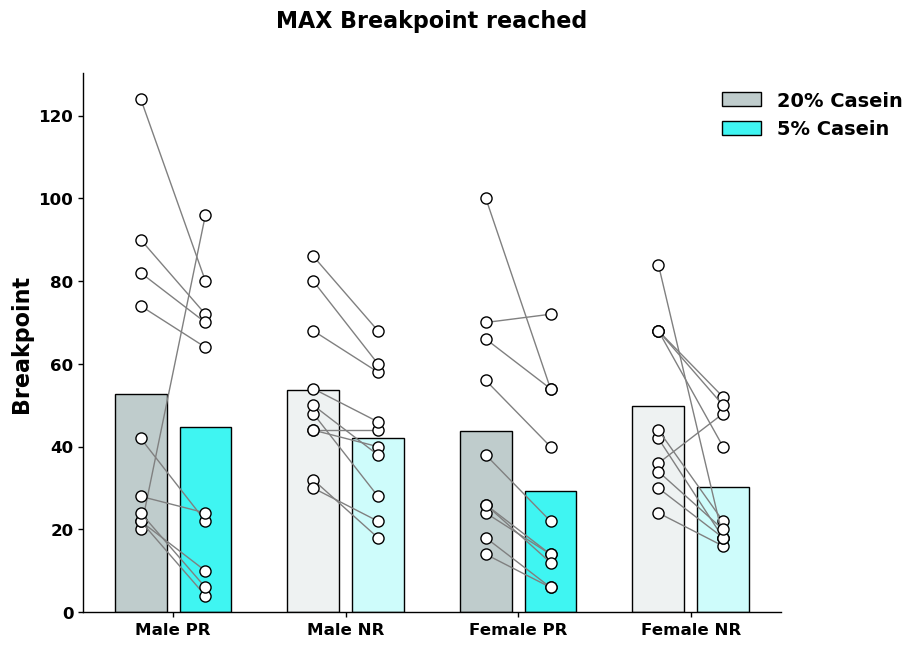

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import trompy as tp

# Define plot style settings
plt.rcParams.update({
    'font.size': 16,          # Global font size
    'font.weight': 'bold',    # Global font weight
    'axes.titlesize': 16,     # Font size of the axes title
    'axes.titleweight': 'bold', # Font weight of the axes title
    'axes.labelsize': 16,     # Font size of the x and y labels
    'axes.labelweight': 'bold', # Font weight of the x and y labels
    'xtick.labelsize': 12,    # Font size of the x tick labels
    'ytick.labelsize': 12,    # Font size of the y tick labels
    'legend.fontsize': 14,    # Font size of the legend
    'figure.titlesize': 16,   # Font size of the figure title
    'figure.titleweight': 'bold' # Font weight of the figure title
})

# Load the data
file_path = '../results/Choice_Session_4_max_num_breakpoints.csv'  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Extract the required data for plotting
def extract_data(sex, diet, pellet_type):
    return data[(data['SEX'] == sex) & (data['DIET'] == diet) & (data['PELLET_TYPE'] == pellet_type)]['AVG_NUM_BREAKPOINTS'].tolist()

# Group data appropriately
pellet_count_group_data_male_pr = [extract_data('M', 'PR', 'CAS5'), extract_data('M', 'PR', 'SUC')]
pellet_count_group_data_male_nr = [extract_data('M', 'NR', 'CAS5'), extract_data('M', 'NR', 'SUC')]
pellet_count_group_data_female_pr = [extract_data('F', 'PR', 'CAS5'), extract_data('F', 'PR', 'SUC')]
pellet_count_group_data_female_nr = [extract_data('F', 'NR', 'CAS5'), extract_data('F', 'NR', 'SUC')]

# Define the color values
high_protein_color = (0.749, 0.8, 0.8)
low_protein_color = (0.247, 0.961, 0.949)
high_protein_color_alpha = (0.749, 0.8, 0.8, 0.25)
low_protein_color_alpha = (0.247, 0.961, 0.949, 0.25)

# Plot the data for average breakpoints
f, ax = plt.subplots(figsize=(9, 7))
positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]

_, _, barlist, _ = tp.barscatter([pellet_count_group_data_male_pr, pellet_count_group_data_male_nr, pellet_count_group_data_female_pr, pellet_count_group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.75,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*8,
                                 barfacecolor=[high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha, high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha],
                                 positions=positions) 

ax.set_title('Average times a breakpoint was reached (5% Casein vs Sucrose)', y=1.07)
ax.legend(barlist, ['20% Casein', '5% Casein'], frameon=False, bbox_to_anchor=(1.2, 1))
ax.set_ylabel('Number of breakpoints')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Male PR', 'Male NR', 'Female PR', 'Female NR'])
f.savefig('../plots/FINAL_PLOTS_FOR_FENS24/C4/Average_times_a_breakpoint_was_reached.pdf', bbox_inches='tight')
plt.show()

# Extract the required data for max pellets
def extract_max_data(sex, diet, pellet_type):
    return data[(data['SEX'] == sex) & (data['DIET'] == diet) & (data['PELLET_TYPE'] == pellet_type)]['AVG_MAX_BREAKPOINT_RATIO'].tolist()

# Group data appropriately
pellet_count_group_data_male_pr_max = [extract_max_data('M', 'PR', 'CAS5'), extract_max_data('M', 'PR', 'SUC')]
pellet_count_group_data_male_nr_max = [extract_max_data('M', 'NR', 'CAS5'), extract_max_data('M', 'NR', 'SUC')]
pellet_count_group_data_female_pr_max = [extract_max_data('F', 'PR', 'CAS5'), extract_max_data('F', 'PR', 'SUC')]
pellet_count_group_data_female_nr_max = [extract_max_data('F', 'NR', 'CAS5'), extract_max_data('F', 'NR', 'SUC')]

# Plot the data for max pellets
f, ax = plt.subplots(figsize=(9, 7))
positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]

_, _, barlist, _ = tp.barscatter([pellet_count_group_data_male_pr_max, pellet_count_group_data_male_nr_max, pellet_count_group_data_female_pr_max, pellet_count_group_data_female_nr_max],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.75,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*8,
                                 barfacecolor=[high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha, high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha],
                                 positions=positions) 

ax.set_title('MAX Breakpoint reached', y=1.07)
ax.legend(barlist, ['20% Casein', '5% Casein'], frameon=False, bbox_to_anchor=(1.2, 1))
ax.set_ylabel('Breakpoint')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Male PR', 'Male NR', 'Female PR', 'Female NR'])
plt.show()


# cell below measures the COST of earning pellets and efficiency of pokes 

In [19]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv

# Function to calculate breakpoints
def calculate_breakpoints(df):
    FR = df["FR"]
    breakpoints = [abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]
    return breakpoints

# Function to get max pellets
def get_max_pellets(df):
    max_pellets = df["Pellet_Count"].max()
    return max_pellets

# Load the metafile
metafile_path = '../FEDXD_METAFILE.csv'
metafile = pd.read_csv(metafile_path)

# Filter for choice session 4
choice_4 = metafile[metafile['CHOICE_SESSION'] == 4]

# Initialize a dictionary to hold results
results = {}

# Iterate through the filtered rows
for _, row in choice_4.iterrows():
    mouse_id = row['MOUSEID']
    sex = row['SEX']
    diet = row['DIET']
    choice_session = row['CHOICE_SESSION']
    pellet_type = row['FED_PELLET']
    filename = f"../data/{row['FEDFILE']}"
    
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"File not found: {filename}")
        continue
    
    # Calculate breakpoints and max pellets
    breakpoints = calculate_breakpoints(df)
    avg_breakpoints = np.mean(breakpoints) if breakpoints else 0
    max_pellets = get_max_pellets(df)
    
    # Calculate the COST (number of pokes divided by number of pellets earned)
    total_pokes = df["Left_Poke_Count"].sum() + df["Right_Poke_Count"].sum()
    total_pellets = df["Pellet_Count"].sum()
    cost = df["Left_Poke_Count"].sum() / total_pellets if total_pellets > 0 else np.nan
    
    # Calculate the efficiency of poking strategy
    efficiency = df["Left_Poke_Count"].sum() / total_pokes if total_pokes > 0 else np.nan
    
    key = (mouse_id, pellet_type)
    if key not in results:
        results[key] = {
            "MOUSEID": mouse_id,
            "SEX": sex,
            "DIET": diet,
            "CHOICE_SESSION": choice_session,
            "PELLET_TYPE": pellet_type,
            "AVG_BREAKPOINTS": [],
            "MAX_PELLETS": max_pellets,
            "COST": [],
            "EFFICIENCY": []
        }
    
    results[key]["AVG_BREAKPOINTS"].append(avg_breakpoints)
    results[key]["COST"].append(cost)
    results[key]["EFFICIENCY"].append(efficiency)

# Calculate the average of average breakpoints, cost, and efficiency for each mouse and pellet type
final_results = []
for key, value in results.items():
    avg_breakpoints = np.mean(value["AVG_BREAKPOINTS"])
    avg_cost = np.nanmean(value["COST"])
    avg_efficiency = np.nanmean(value["EFFICIENCY"])
    final_results.append({
        "MOUSEID": value["MOUSEID"],
        "SEX": value["SEX"],
        "DIET": value["DIET"],
        "CHOICE_SESSION": value["CHOICE_SESSION"],
        "PELLET_TYPE": value["PELLET_TYPE"],
        "AVG_BREAKPOINTS": avg_breakpoints,
        "MAX_PELLETS": value["MAX_PELLETS"],
        "COST": avg_cost,
        "EFFICIENCY": avg_efficiency
    })

# Convert final results to DataFrame and save
results_df = pd.DataFrame(final_results)

# Uncomment the following lines to save the results to a file
# results_df.to_csv("/mnt/data/Choice_Session_4_Avg_Breakpoints_Cost_and_Efficiency.csv", index=False)
# import ace_tools as tools; tools.display_dataframe_to_user(name="Average Break Points, Cost and Efficiency for Choice Session 4", dataframe=results_df)

results_df
#results_df.to_csv("../results/Choice_Session_4_Cost_and_Efficiency.csv", index=False)


# plotting pellet cost and poke ratio


c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


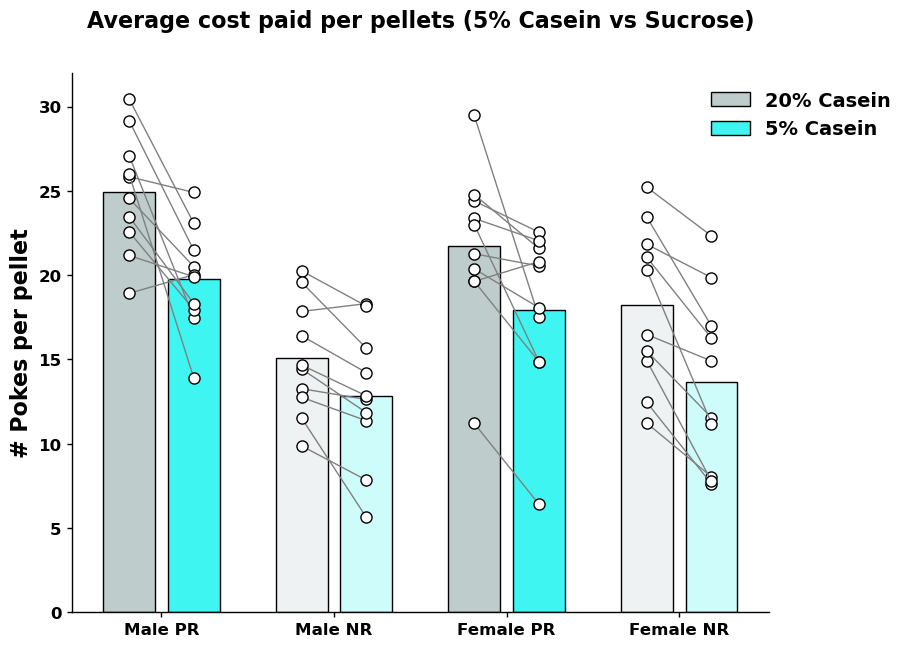

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import trompy as tp

# Define plot style settings
plt.rcParams.update({
    'font.size': 16,          # Global font size
    'font.weight': 'bold',    # Global font weight
    'axes.titlesize': 16,     # Font size of the axes title
    'axes.titleweight': 'bold', # Font weight of the axes title
    'axes.labelsize': 16,     # Font size of the x and y labels
    'axes.labelweight': 'bold', # Font weight of the x and y labels
    'xtick.labelsize': 12,    # Font size of the x tick labels
    'ytick.labelsize': 12,    # Font size of the y tick labels
    'legend.fontsize': 14,    # Font size of the legend
    'figure.titlesize': 16,   # Font size of the figure title
    'figure.titleweight': 'bold' # Font weight of the figure title
})

# Load the data
file_path = "../results/Choice_Session_4_Cost_and_Efficiency.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Extract the required data for plotting
def extract_data(sex, diet, pellet_type):
    return data[(data['SEX'] == sex) & (data['DIET'] == diet) & (data['PELLET_TYPE'] == pellet_type)]['COST'].tolist()

# Group data appropriately
pellet_count_group_data_male_pr = [extract_data('M', 'PR', 'CAS5'), extract_data('M', 'PR', 'SUC')]
pellet_count_group_data_male_nr = [extract_data('M', 'NR', 'CAS5'), extract_data('M', 'NR', 'SUC')]
pellet_count_group_data_female_pr = [extract_data('F', 'PR', 'CAS5'), extract_data('F', 'PR', 'SUC')]
pellet_count_group_data_female_nr = [extract_data('F', 'NR', 'CAS5'), extract_data('F', 'NR', 'SUC')]

# Define the color values
high_protein_color = (0.749, 0.8, 0.8)
low_protein_color = (0.247, 0.961, 0.949)
high_protein_color_alpha = (0.749, 0.8, 0.8, 0.25)
low_protein_color_alpha = (0.247, 0.961, 0.949, 0.25)

# Plot the data for cost
f, ax = plt.subplots(figsize=(9, 7))
positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]

_, _, barlist, _ = tp.barscatter([pellet_count_group_data_male_pr, pellet_count_group_data_male_nr, pellet_count_group_data_female_pr, pellet_count_group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.75,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*8,
                                 barfacecolor=[high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha, high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha],
                                 positions=positions) 

ax.set_title('Average cost paid per pellets (5% Casein vs Sucrose)', y=1.07)
ax.legend(barlist, ['20% Casein', '5% Casein'], frameon=False, bbox_to_anchor=(1.2, 1))

ax.set_ylabel('# Pokes per pellet')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Male PR', 'Male NR', 'Female PR', 'Female NR'])
f.savefig('../plots/FINAL_PLOTS_FOR_FENS24/C4/Average_cost_paid_per_pellets.pdf', bbox_inches='tight')
plt.show()

# Extract the required data for efficiency
def extract_max_data(sex, diet, pellet_type):
    return data[(data['SEX'] == sex) & (data['DIET'] == diet) & (data['PELLET_TYPE'] == pellet_type)]['EFFICIENCY'].tolist()

# # Group data appropriately
# pellet_count_group_data_male_pr_max = [extract_max_data('M', 'PR', 'CAS5'), extract_max_data('M', 'PR', 'SUC')]
# pellet_count_group_data_male_nr_max = [extract_max_data('M', 'NR', 'CAS5'), extract_max_data('M', 'NR', 'SUC')]
# pellet_count_group_data_female_pr_max = [extract_max_data('F', 'PR', 'CAS5'), extract_max_data('F', 'PR', 'SUC')]
# pellet_count_group_data_female_nr_max = [extract_max_data('F', 'NR', 'CAS5'), extract_max_data('F', 'NR', 'SUC')]

# # Plot the data for efficiency
# f, ax = plt.subplots(figsize=(9, 7))
# positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]

# _, _, barlist, _ = tp.barscatter([pellet_count_group_data_male_pr_max, pellet_count_group_data_male_nr_max, pellet_count_group_data_female_pr_max, pellet_count_group_data_female_nr_max],
#                                  ax=ax, paired=True, linewidth=1, groupwidth=0.75,
#                                  barfacecolor_option="individual",
#                                  baredgecolor=["black"]*8,
#                                  barfacecolor=[high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha, high_protein_color, low_protein_color, high_protein_color_alpha, low_protein_color_alpha],
#                                  positions=positions) 

# ax.set_title('POKE EFFICIENCY', y=1.07)
# ax.legend(barlist, ['20% Casein', '5% Casein'], frameon=False, bbox_to_anchor=(1.2, 1))
# ax.set_xlabel('Groups')
# ax.set_ylabel('Number of Pellets')
# ax.set_xticks([1, 2, 3, 4])
# ax.set_xticklabels(['Male PR', 'Male NR', 'Female PR', 'Female NR'])
# plt.show()


In [24]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv

# Function to calculate breakpoints
def calculate_breakpoints(df):
    FR = df["FR"]
    breakpoints = [abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]
    return breakpoints

# Function to get max pellets
def get_max_pellets(df):
    max_pellets = df["Pellet_Count"].max()
    return max_pellets

# Function to calculate average InterPelletInterval
def calculate_avg_interpelletinterval(df):
    pellet_times = df[df["Event"] == "Pellet"]["MM:DD:YYYY hh:mm:ss"]
    pellet_times = pd.to_datetime(pellet_times)
    inter_pellet_intervals = pellet_times.diff().dt.total_seconds().dropna()
    avg_inter_pellet_interval = inter_pellet_intervals.mean() if len(inter_pellet_intervals) > 0 else np.nan
    return avg_inter_pellet_interval

# Load the metafile
metafile_path = '../FEDXD_METAFILE.csv'
metafile = pd.read_csv(metafile_path)

# Filter for choice session 4
choice_4 = metafile[metafile['CHOICE_SESSION'] == 4]

# Initialize a dictionary to hold results
results = {}

# Iterate through the filtered rows
for _, row in choice_4.iterrows():
    mouse_id = row['MOUSEID']
    sex = row['SEX']
    diet = row['DIET']
    choice_session = row['CHOICE_SESSION']
    pellet_type = row['FED_PELLET']
    filename = f"../data/{row['FEDFILE']}"
    
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"File not found: {filename}")
        continue
    
    # Calculate breakpoints, max pellets, and average interpellet interval
    breakpoints = calculate_breakpoints(df)
    avg_breakpoints = np.mean(breakpoints) if breakpoints else 0
    max_pellets = get_max_pellets(df)
    avg_interpelletinterval = calculate_avg_interpelletinterval(df)
    
    # Calculate the COST (number of pokes divided by number of pellets earned)
    total_pokes = df["Left_Poke_Count"].sum() + df["Right_Poke_Count"].sum()
    total_pellets = df["Pellet_Count"].sum()
    cost = df["Left_Poke_Count"].sum() / total_pellets if total_pellets > 0 else np.nan
    
    # Calculate the efficiency of poking strategy
    efficiency = df["Left_Poke_Count"].sum() / total_pokes if total_pokes > 0 else np.nan
    
    key = (mouse_id, pellet_type)
    if key not in results:
        results[key] = {
            "MOUSEID": mouse_id,
            "SEX": sex,
            "DIET": diet,
            "CHOICE_SESSION": choice_session,
            "PELLET_TYPE": pellet_type,
            "AVG_BREAKPOINTS": [],
            "MAX_PELLETS": max_pellets,
            "COST": [],
            "EFFICIENCY": [],
            "INTER_PELLET_INTERVAL": []
        }
    
    results[key]["AVG_BREAKPOINTS"].append(avg_breakpoints)
    results[key]["COST"].append(cost)
    results[key]["EFFICIENCY"].append(efficiency)
    results[key]["INTER_PELLET_INTERVAL"].append(avg_interpelletinterval)

# Calculate the average of average breakpoints, cost, efficiency, and interpellet interval for each mouse and pellet type
final_results = []
for key, value in results.items():
    avg_breakpoints = np.mean(value["AVG_BREAKPOINTS"])
    avg_cost = np.nanmean(value["COST"])
    avg_efficiency = np.nanmean(value["EFFICIENCY"])
    avg_interpelletinterval = np.nanmean(value["INTER_PELLET_INTERVAL"])
    final_results.append({
        "MOUSEID": value["MOUSEID"],
        "SEX": value["SEX"],
        "DIET": value["DIET"],
        "CHOICE_SESSION": value["CHOICE_SESSION"],
        "PELLET_TYPE": value["PELLET_TYPE"],
        "AVG_BREAKPOINTS": avg_breakpoints,
        "MAX_PELLETS": value["MAX_PELLETS"],
        "COST": avg_cost,
        "EFFICIENCY": avg_efficiency,
        "AVG_INTER_PELLET_INTERVAL": avg_interpelletinterval
    })

# Convert final results to DataFrame and save
results_df = pd.DataFrame(final_results)

# Uncomment the following lines to save the results to a file
# results_df.to_csv("/mnt/data/Choice_Session_4_Avg_Breakpoints_Cost_and_Efficiency.csv", index=False)
# import ace_tools as tools; tools.display_dataframe_to_user(name="Average Break Points, Cost and Efficiency for Choice Session 4", dataframe=results_df)

results_df
results_df.to_csv("../results/Choice_Session_4_IPI.csv", index=False)


c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


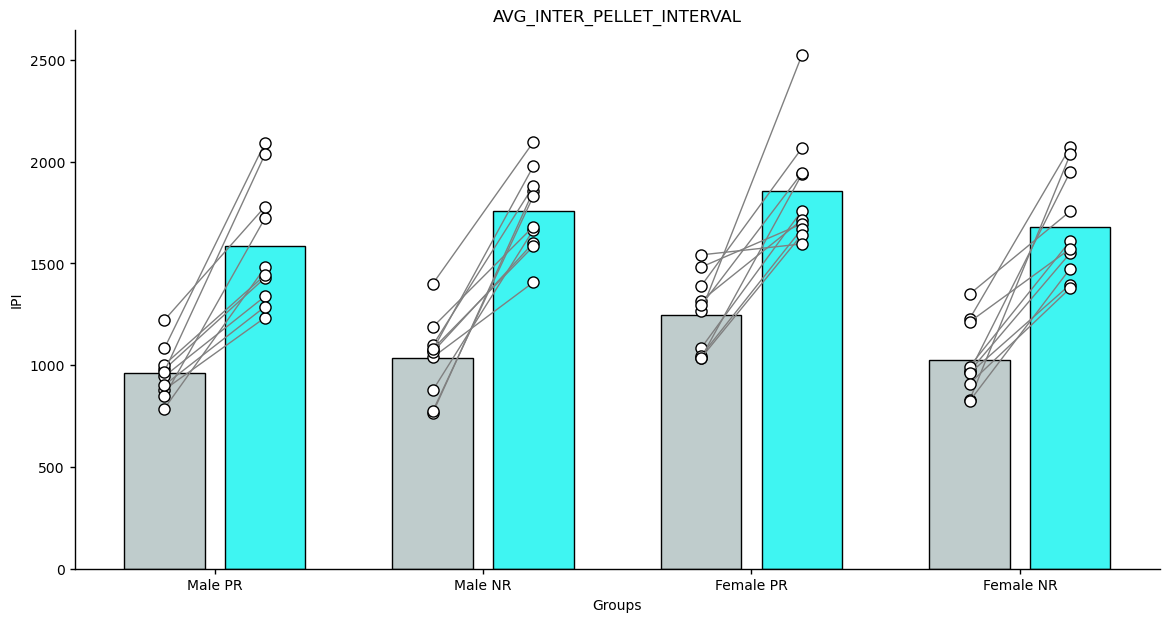

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


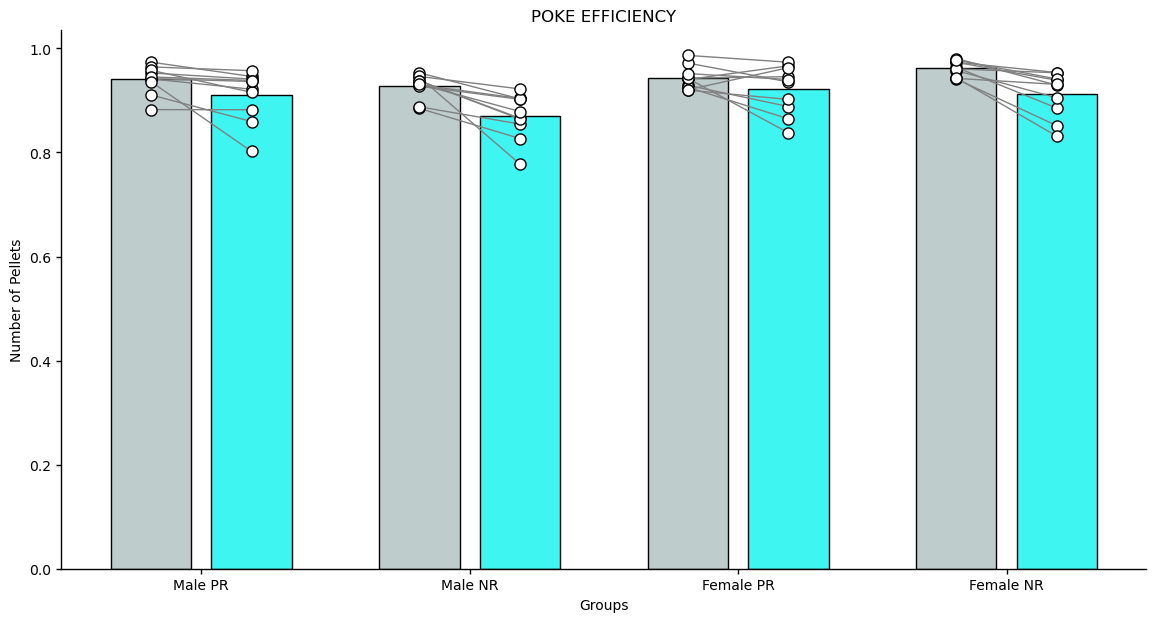

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import trompy as tp

# Load the data
file_path = "../results/Choice_Session_4_IPI.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Extract the required data for plotting
def extract_data(sex, diet, pellet_type):
    return data[(data['SEX'] == sex) & (data['DIET'] == diet) & (data['PELLET_TYPE'] == pellet_type)]['AVG_INTER_PELLET_INTERVAL'].tolist()

# Group data appropriately
pellet_count_group_data_male_pr = [extract_data('M', 'PR', 'CAS5'), extract_data('M', 'PR', 'SUC')]
pellet_count_group_data_male_nr = [extract_data('M', 'NR', 'CAS5'), extract_data('M', 'NR', 'SUC')]
pellet_count_group_data_female_pr = [extract_data('F', 'PR', 'CAS5'), extract_data('F', 'PR', 'SUC')]
pellet_count_group_data_female_nr = [extract_data('F', 'NR', 'CAS5'), extract_data('F', 'NR', 'SUC')]

# Define the color values
high_protein_color = (0.749, 0.8, 0.8)
low_protein_color = (0.247, 0.961, 0.949)
high_protein_color_alpha = (0.749, 0.8, 0.8, 0.1)
low_protein_color_alpha = (0.247, 0.961, 0.949, 0.1)

# Plot the data for average breakpoints
f, ax = plt.subplots(figsize=(14, 7))
positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]

_, _, barlist, _ = tp.barscatter([pellet_count_group_data_male_pr, pellet_count_group_data_male_nr, pellet_count_group_data_female_pr, pellet_count_group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.75,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*8,
                                 barfacecolor=[high_protein_color, low_protein_color, high_protein_color, low_protein_color, high_protein_color, low_protein_color, high_protein_color, low_protein_color],
                                 positions=positions) 

ax.set_title('AVG_INTER_PELLET_INTERVAL')
ax.set_xlabel('Groups')
ax.set_ylabel('IPI')
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Male PR', 'Male NR', 'Female PR', 'Female NR'])
plt.show()

# Extract the required data for max pellets
def extract_max_data(sex, diet, pellet_type):
    return data[(data['SEX'] == sex) & (data['DIET'] == diet) & (data['PELLET_TYPE'] == pellet_type)]['EFFICIENCY'].tolist()

# Group data appropriately
pellet_count_group_data_male_pr_max = [extract_max_data('M', 'PR', 'CAS5'), extract_max_data('M', 'PR', 'SUC')]
pellet_count_group_data_male_nr_max = [extract_max_data('M', 'NR', 'CAS5'), extract_max_data('M', 'NR', 'SUC')]
pellet_count_group_data_female_pr_max = [extract_max_data('F', 'PR', 'CAS5'), extract_max_data('F', 'PR', 'SUC')]
pellet_count_group_data_female_nr_max = [extract_max_data('F', 'NR', 'CAS5'), extract_max_data('F', 'NR', 'SUC')]

# Plot the data for max pellets
f, ax = plt.subplots(figsize=(14, 7))
positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]

_, _, barlist, _ = tp.barscatter([pellet_count_group_data_male_pr_max, pellet_count_group_data_male_nr_max, pellet_count_group_data_female_pr_max, pellet_count_group_data_female_nr_max],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.75,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*8,
                                 barfacecolor=[high_protein_color, low_protein_color, high_protein_color, low_protein_color, high_protein_color, low_protein_color, high_protein_color, low_protein_color],
                                 positions=positions) 

ax.set_title('POKE EFFICIENCY')
ax.set_xlabel('Groups')
ax.set_ylabel('Number of Pellets')
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Male PR', 'Male NR', 'Female PR', 'Female NR'])
plt.show()


In [35]:
import pandas as pd
import numpy as np

# Function to calculate breakpoints
def calculate_breakpoints(df):
    FR = df["FR"]
    breakpoints = [abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]
    return breakpoints

# Function to get max pellets
def get_max_pellets(df):
    max_pellets = df["Pellet_Count"].max()
    return max_pellets

# Function to calculate average InterPelletInterval
def calculate_avg_interpelletinterval(df):
    pellet_times = df[df["Event"] == "Pellet"]["MM:DD:YYYY hh:mm:ss"]
    pellet_times = pd.to_datetime(pellet_times)
    inter_pellet_intervals = pellet_times.diff().dt.total_seconds().dropna()
    avg_inter_pellet_interval = inter_pellet_intervals.mean() if len(inter_pellet_intervals) > 0 else np.nan
    return avg_inter_pellet_interval

# Function to count switches between pellet types
def count_switches(df1, df2):
    df1 = df1[df1["Event"] == "Pellet"]
    df2 = df2[df2["Event"] == "Pellet"]
    
    df1["Timestamp"] = pd.to_datetime(df1["MM:DD:YYYY hh:mm:ss"])
    df2["Timestamp"] = pd.to_datetime(df2["MM:DD:YYYY hh:mm:ss"])
    
    df1 = df1[["Timestamp"]].assign(Pellet_Type="CAS5")
    df2 = df2[["Timestamp"]].assign(Pellet_Type="SUC")
    
    combined_df = pd.concat([df1, df2]).sort_values("Timestamp").reset_index(drop=True)
    
    combined_df["Previous_Pellet_Type"] = combined_df["Pellet_Type"].shift(1)
    combined_df["Switch"] = combined_df["Pellet_Type"] != combined_df["Previous_Pellet_Type"]
    
    switch_count = combined_df["Switch"].sum() - 1  # Subtract 1 because the first entry will always be considered a switch
    return switch_count

# Load the metafile
metafile_path = '../FEDXD_METAFILE.csv'
metafile = pd.read_csv(metafile_path)

# Filter for choice session 4
choice_4 = metafile[metafile['CHOICE_SESSION'] == 4]

# Initialize a dictionary to hold results
results = []

# Group by mouse ID and process each mouse
mouse_groups = choice_4.groupby('MOUSEID')

for mouse_id, group in mouse_groups:
    pellet_files = {}
    for _, row in group.iterrows():
        pellet_type = row['FED_PELLET']
        filename = f"../data/{row['FEDFILE']}"
        try:
            df = pd.read_csv(filename)
            pellet_files[pellet_type] = df
        except FileNotFoundError:
            print(f"File not found: {filename}")
            continue
    
    if len(pellet_files) == 2:
        pellet_types = list(pellet_files.keys())
        df1 = pellet_files[pellet_types[0]]
        df2 = pellet_files[pellet_types[1]]
        
        switch_count = count_switches(df1, df2)
        
        sex = group['SEX'].values[0]
        diet = group['DIET'].values[0]
        choice_session = group['CHOICE_SESSION'].values[0]
        
        # Calculate aggregate metrics across both pellet types
        all_dfs = pd.concat([df1, df2])
        
        breakpoints = calculate_breakpoints(all_dfs)
        avg_breakpoints = np.mean(breakpoints) if breakpoints else 0
        max_pellets = get_max_pellets(all_dfs)
        avg_interpelletinterval = calculate_avg_interpelletinterval(all_dfs)
        
        # Calculate the COST (number of pokes divided by number of pellets earned)
        total_pokes = all_dfs["Left_Poke_Count"].sum() + all_dfs["Right_Poke_Count"].sum()
        total_pellets = all_dfs["Pellet_Count"].sum()
        cost = all_dfs["Left_Poke_Count"].sum() / total_pellets if total_pellets > 0 else np.nan
        
        # Calculate the efficiency of poking strategy
        efficiency = all_dfs["Left_Poke_Count"].sum() / total_pokes if total_pokes > 0 else np.nan
        
        results.append({
            "MOUSEID": mouse_id,
            "SEX": sex,
            "DIET": diet,
            "CHOICE_SESSION": choice_session,
            "AVG_BREAKPOINTS": avg_breakpoints,
            "MAX_PELLETS": max_pellets,
            "COST": cost,
            "EFFICIENCY": efficiency,
            "AVG_INTER_PELLET_INTERVAL": avg_interpelletinterval,
            "SWITCH_COUNT": switch_count
        })

# Convert final results to DataFrame and save
results_df = pd.DataFrame(results)

# Uncomment the following lines to save the results to a file
# results_df.to_csv("/mnt/data/Choice_Session_4_Avg_Breakpoints_Cost_and_Efficiency.csv", index=False)
# import ace_tools as tools; tools.display_dataframe_to_user(name="Average Break Points, Cost and Efficiency for Choice Session 4", dataframe=results_df)

results_df
#results_df.to_csv("../results/Choice_Session_4_SWITCH.csv", index=False)


C:\Users\hta031\AppData\Local\Temp\ipykernel_50876\3288294973.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Timestamp"] = pd.to_datetime(df1["MM:DD:YYYY hh:mm:ss"])
C:\Users\hta031\AppData\Local\Temp\ipykernel_50876\3288294973.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Timestamp"] = pd.to_datetime(df2["MM:DD:YYYY hh:mm:ss"])
C:\Users\hta031\AppData\Local\Temp\ipykernel_50876\3288294973.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

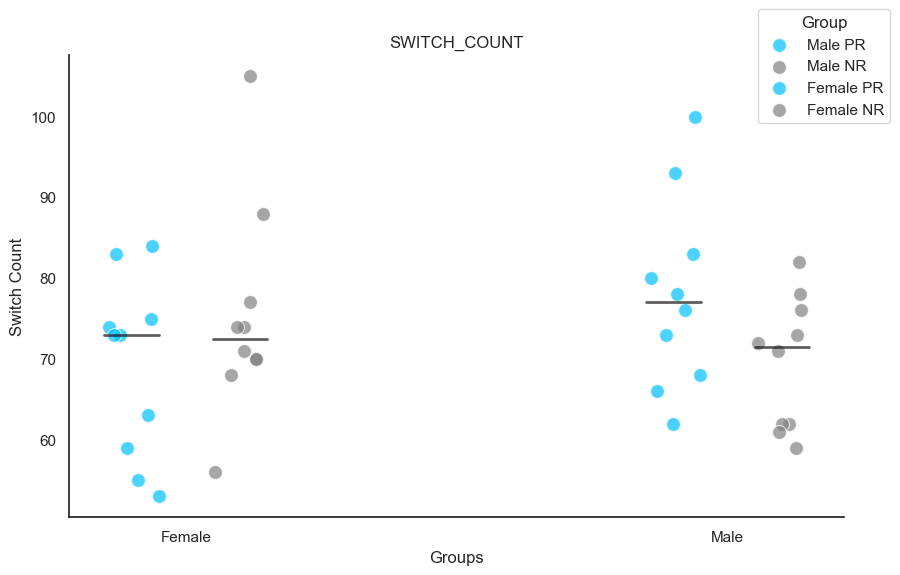

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
file_path = "../results/Choice_Session_4_SWITCH.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Function to extract data for plotting
def extract_data(sex, diet):
    return data[(data['SEX'] == sex) & (data['DIET'] == diet)]['SWITCH_COUNT'].tolist()

# Group data appropriately
pellet_count_group_data = {
    'Male PR': extract_data('M', 'PR'),
    'Male NR': extract_data('M', 'NR'),
    'Female PR': extract_data('F', 'PR'),
    'Female NR': extract_data('F', 'NR')
}

# Define the color values
colors = {'PR': 'deepskyblue', 'NR': 'grey'}
sex_mapping = {'F': 0, 'M': 1}
offset = {'PR': -0.1, 'NR': 0.1}
diets = ['PR', 'NR']

# Plotting scatter plots using seaborn and matplotlib
sns.set(style="white")

plt.figure(figsize=(10, 6))

# Iterate through the groups and plot
for i, (group, counts) in enumerate(pellet_count_group_data.items()):
    sex, diet = group.split()
    jitter = np.random.uniform(-0.05, 0.05, size=len(counts))  # Adding jitter for better dispersion
    sns.scatterplot(
        x=[sex_mapping[sex[0]] + offset[diet] + jitter[j] for j in range(len(counts))], 
        y=counts,
        label=f'{sex} {diet}', s=100, alpha=0.7, color=colors[diet]
    )

# Add title and labels
plt.title('SWITCH_COUNT')
plt.xlabel('Groups')
plt.ylabel('Switch Count')
plt.xticks([0, 1], ['Female', 'Male'])

# Customize legend
plt.legend(title='Group', loc='upper right', frameon=True, borderaxespad=-3)

# Calculate and plot median lines
for group, counts in pellet_count_group_data.items():
    sex, diet = group.split()
    median_value = np.median(counts)
    plt.plot(
        [sex_mapping[sex[0]] + offset[diet] - 0.05, sex_mapping[sex[0]] + offset[diet] + 0.05],
        [median_value, median_value], color='k', linewidth=2, alpha=0.7
    )

# Remove the background grid lines
plt.grid(False)

# Remove top and right spines
sns.despine()

plt.show()
